# Keras Model without Drop Out Layer and using Categorical Crossentropy

## 0. Loading required libraries 

In [6]:
library(DBI)
library(corrgram)
library(caret)
library(gridExtra)
library(ggpubr)

library(keras)
library(kerasR)

## 1. Setting up the code parallelizing

<p>Today is a good practice to start parallelizing your code. The common motivation behind parallel computing is that something is taking too long time. For somebody that means any computation that takes more than 3 minutes – this because parallelization is incredibly simple and most tasks that take time are embarrassingly parallel. Here are a few common tasks that fit the description:
    <ul>
        <li>Bootstrapping</li>
        <li>Cross-validation</li>
        <li>Multivariate Imputation by Chained Equations (MICE)</li>
        <li>Fitting multiple regression models</li>
    </ul>
You can find out more about parallelizing your computations in R - <a href="http://gforge.se/2015/02/how-to-go-parallel-in-r-basics-tips/">here</a>.
</p>

<h3>For Windows users</h3>

In [ ]:
# process in parallel on Windows
library(doParallel) 
cl <- makeCluster(detectCores(), type='PSOCK')
registerDoParallel(cl)

<h3>For Mac OSX and Unix like systems users</h3>

In [9]:
# process in parallel on Mac OSX and UNIX like systems
library(doMC)
registerDoMC(cores = 4)

## 2. Importing Data

In [8]:
#Set working directory where CSV is located

#getwd()
#setwd("...YOUR WORKING DIRECTORY WITH A DATASET...")
#getwd()

In [10]:
# Load the DataSets: 
dataSet <- read.csv("TelcoCustomerChurnDataset.csv", header = TRUE, sep = ',')
colnames(dataSet) #Check the dataframe column names

[1] "Account_Length" "Vmail_Message"  "Day_Mins"       "Eve_Mins"      
 [5] "Night_Mins"     "Intl_Mins"      "CustServ_Calls" "Churn"         
 [9] "Intl_Plan"      "Vmail_Plan"     "Day_Calls"      "Day_Charge"    
[13] "Eve_Calls"      "Eve_Charge"     "Night_Calls"    "Night_Charge"  
[17] "Intl_Calls"     "Intl_Charge"    "State"          "Area_Code"     
[21] "Phone"

## 3. Exploring the dataset

In [11]:
# Print top 10 rows in the dataSet
head(dataSet, 10)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,⋯,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<fct>,<int>,<fct>
1,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,⋯,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
2,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,⋯,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
3,137,0,243.4,121.2,162.6,12.2,0,no,no,no,⋯,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
4,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,⋯,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
5,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,⋯,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
6,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,⋯,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
7,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,⋯,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
8,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,⋯,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
9,117,0,184.5,351.6,215.8,8.7,1,no,no,no,⋯,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719


In [12]:
# Print last 10 rows in the dataSet
tail(dataSet, 10)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,⋯,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<fct>,<int>,<fct>
3324,117,0,118.4,249.3,227.0,13.6,5,yes,no,no,⋯,20.13,97,21.19,56,10.22,3,3.67,IN,415,362-5899
3325,159,0,169.8,197.7,193.7,11.6,1,no,no,no,⋯,28.87,105,16.80,82,8.72,4,3.13,WV,415,377-1164
3326,78,0,193.4,116.9,243.3,9.3,2,no,no,no,⋯,32.88,88,9.94,109,10.95,4,2.51,OH,408,368-8555
3327,96,0,106.6,284.8,178.9,14.9,1,no,no,no,⋯,18.12,87,24.21,92,8.05,7,4.02,OH,415,347-6812
3328,79,0,134.7,189.7,221.4,11.8,2,no,no,no,⋯,22.90,68,16.12,128,9.96,5,3.19,SC,415,348-3830
3329,192,36,156.2,215.5,279.1,9.9,2,no,no,yes,⋯,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3330,68,0,231.1,153.4,191.3,9.6,3,no,no,no,⋯,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3331,28,0,180.8,288.8,191.9,14.1,2,no,no,no,⋯,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3332,184,0,213.8,159.6,139.2,5.0,2,no,yes,no,⋯,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


In [13]:
# Dimention of Dataset
dim(dataSet)

[1] 3333   21

In [14]:
# Check Data types of each column
table(unlist(lapply(dataSet, class)))


 factor integer numeric 
      5       8       8 

In [15]:
# Check Data types of individual column
data.class(dataSet$Account_Length) 
data.class(dataSet$Vmail_Message) 
data.class(dataSet$Day_Mins)
data.class(dataSet$Eve_Mins)
data.class(dataSet$Night_Mins) 
data.class(dataSet$Intl_Mins)
data.class(dataSet$CustServ_Calls)
data.class(dataSet$Intl_Plan) 
data.class(dataSet$Vmail_Plan)
data.class(dataSet$Day_Calls)
data.class(dataSet$Day_Charge) 
data.class(dataSet$Eve_Calls)
data.class(dataSet$Eve_Charge) 
data.class(dataSet$Night_Calls)
data.class(dataSet$Night_Charge)
data.class(dataSet$Intl_Calls) 
data.class(dataSet$Intl_Charge)
data.class(dataSet$State) 
data.class(dataSet$Phone)
data.class(dataSet$Churn)

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "factor"

[1] "factor"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "factor"

[1] "factor"

[1] "factor"

<h4>Converting variables <i>Intl_Plan, Vmail_Plan, State</i> to numeric data type.</h4>

In [16]:
dataSet$Intl_Plan <- as.numeric(dataSet$Intl_Plan)
dataSet$Vmail_Plan <- as.numeric(dataSet$Vmail_Plan)
dataSet$State <- as.numeric(dataSet$State)

In [17]:
# Check Data types of each column
table(unlist(lapply(dataSet, class)))


 factor integer numeric 
      2       8      11 

## 4. Exploring or Summarising dataset with descriptive statistics

In [18]:
# Find out if there is missing value in rows
rowSums(is.na(dataSet))

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1148] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1222] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1370] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1407] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1518] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1555] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1592] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1629] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1666] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1703] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1740] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1777] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1814] 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [19]:
# Find out if there is missing value in columns
colSums(is.na(dataSet))

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
             0              0              0              0              0 
     Intl_Mins CustServ_Calls          Churn      Intl_Plan     Vmail_Plan 
             0              0              0              0              0 
     Day_Calls     Day_Charge      Eve_Calls     Eve_Charge    Night_Calls 
             0              0              0              0              0 
  Night_Charge     Intl_Calls    Intl_Charge          State      Area_Code 
             0              0              0              0              0 
         Phone 
             0

<h3>Missing value checking using different packages (<i>mice</i> and <i>VIM</i>)</h3>


Attaching package: ‘mice’


The following objects are masked from ‘package:base’:

    cbind, rbind




 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,⋯,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,
3333,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


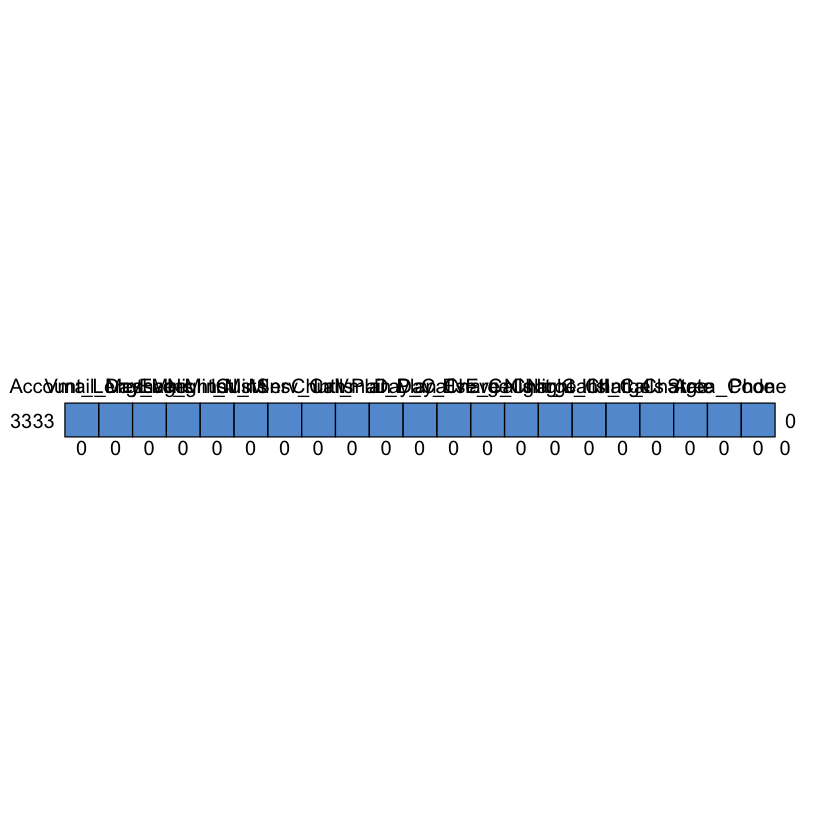

In [20]:
#Checking missing value with the mice package
library(mice)
md.pattern(dataSet)

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep





 Variables sorted by number of missings: 
       Variable Count
 Account_Length     0
  Vmail_Message     0
       Day_Mins     0
       Eve_Mins     0
     Night_Mins     0
      Intl_Mins     0
 CustServ_Calls     0
          Churn     0
      Intl_Plan     0
     Vmail_Plan     0
      Day_Calls     0
     Day_Charge     0
      Eve_Calls     0
     Eve_Charge     0
    Night_Calls     0
   Night_Charge     0
     Intl_Calls     0
    Intl_Charge     0
          State     0
      Area_Code     0
          Phone     0


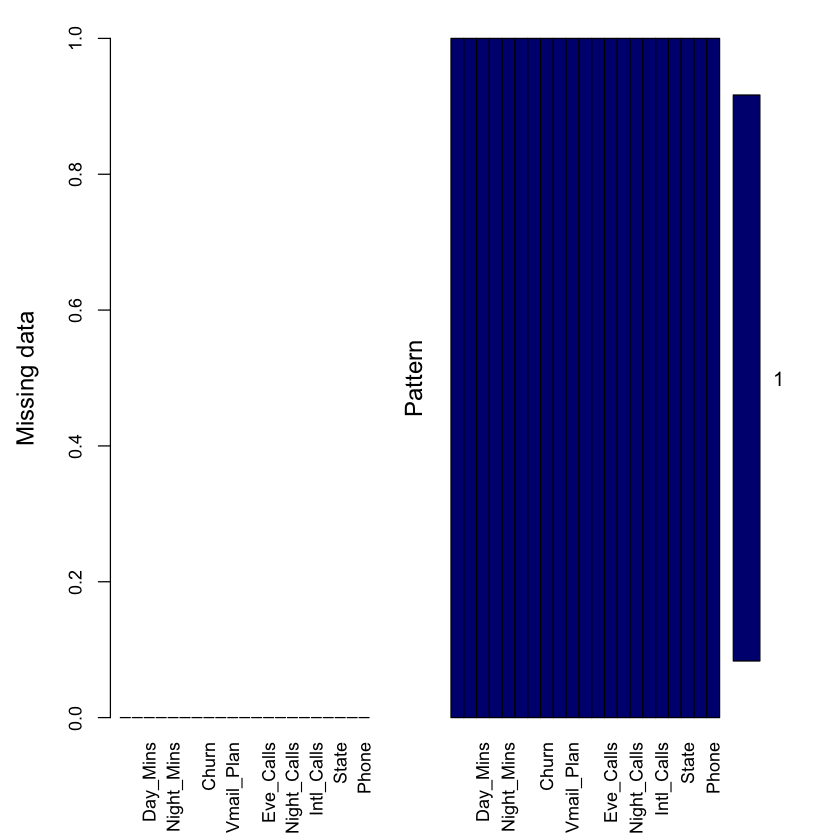

In [21]:
#Checking missing value with the VIM package
library(VIM)
mice_plot <- aggr(dataSet, col=c('navyblue','yellow'),
                  numbers=TRUE, sortVars=TRUE,
                  labels=names(dataSet[1:21]), cex.axis=.9,
                  gap=3, ylab=c("Missing data","Pattern"))

<p>After the observation, we can claim that dataset contains no missing values.</p>

<h3>Summary of dataset</h3>

In [22]:
# Selecting just columns with numeric data type
numericalCols <- colnames(dataSet[c(1:7,9:20)])

<p>Difference between the <b>lapply</b> and <b>sapply</b> functions <i>(we will use them in the next 2 cells)</i>:<br>
We use <b>lapply</b> - when we want to apply a function to each element of a <i>list</i> in turn and get a <i>list back</i>.<br>
We use <b>sapply</b> - when we want to apply a function to each element of a <i>list</i> in turn, but we want a <i>vector back</i>, rather than a list.<br>
</p>

<h4>Finding statistics metrics with <i>lapply</i> function</h4>

In [23]:
#Sum
lapply(dataSet[numericalCols], FUN = sum)

$Account_Length
[1] 336849

$Vmail_Message
[1] 26994

$Day_Mins
[1] 599190.4

$Eve_Mins
[1] 669867.5

$Night_Mins
[1] 669506.5

$Intl_Mins
[1] 34120.9

$CustServ_Calls
[1] 5209

$Intl_Plan
[1] 3656

$Vmail_Plan
[1] 4255

$Day_Calls
[1] 334752

$Day_Charge
[1] 101864.2

$Eve_Calls
[1] 333681

$Eve_Charge
[1] 56939.44

$Night_Calls
[1] 333659

$Night_Charge
[1] 30128.07

$Intl_Calls
[1] 14930

$Intl_Charge
[1] 9214.35

$State
[1] 90189

$Area_Code
[1] 1457129

In [24]:
#Mean
lapply(dataSet[numericalCols], FUN = mean)

$Account_Length
[1] 101.0648

$Vmail_Message
[1] 8.09901

$Day_Mins
[1] 179.7751

$Eve_Mins
[1] 200.9803

$Night_Mins
[1] 200.872

$Intl_Mins
[1] 10.23729

$CustServ_Calls
[1] 1.562856

$Intl_Plan
[1] 1.09691

$Vmail_Plan
[1] 1.276628

$Day_Calls
[1] 100.4356

$Day_Charge
[1] 30.56231

$Eve_Calls
[1] 100.1143

$Eve_Charge
[1] 17.08354

$Night_Calls
[1] 100.1077

$Night_Charge
[1] 9.039325

$Intl_Calls
[1] 4.479448

$Intl_Charge
[1] 2.764581

$State
[1] 27.05941

$Area_Code
[1] 437.1824

In [25]:
#median
lapply(dataSet[numericalCols], FUN = median)

$Account_Length
[1] 101

$Vmail_Message
[1] 0

$Day_Mins
[1] 179.4

$Eve_Mins
[1] 201.4

$Night_Mins
[1] 201.2

$Intl_Mins
[1] 10.3

$CustServ_Calls
[1] 1

$Intl_Plan
[1] 1

$Vmail_Plan
[1] 1

$Day_Calls
[1] 101

$Day_Charge
[1] 30.5

$Eve_Calls
[1] 100

$Eve_Charge
[1] 17.12

$Night_Calls
[1] 100

$Night_Charge
[1] 9.05

$Intl_Calls
[1] 4

$Intl_Charge
[1] 2.78

$State
[1] 27

$Area_Code
[1] 415

In [26]:
#Min
lapply(dataSet[numericalCols], FUN = min)

$Account_Length
[1] 1

$Vmail_Message
[1] 0

$Day_Mins
[1] 0

$Eve_Mins
[1] 0

$Night_Mins
[1] 23.2

$Intl_Mins
[1] 0

$CustServ_Calls
[1] 0

$Intl_Plan
[1] 1

$Vmail_Plan
[1] 1

$Day_Calls
[1] 0

$Day_Charge
[1] 0

$Eve_Calls
[1] 0

$Eve_Charge
[1] 0

$Night_Calls
[1] 33

$Night_Charge
[1] 1.04

$Intl_Calls
[1] 0

$Intl_Charge
[1] 0

$State
[1] 1

$Area_Code
[1] 408

In [27]:
#Max
lapply(dataSet[numericalCols], FUN = max)

$Account_Length
[1] 243

$Vmail_Message
[1] 51

$Day_Mins
[1] 350.8

$Eve_Mins
[1] 363.7

$Night_Mins
[1] 395

$Intl_Mins
[1] 20

$CustServ_Calls
[1] 9

$Intl_Plan
[1] 2

$Vmail_Plan
[1] 2

$Day_Calls
[1] 165

$Day_Charge
[1] 59.64

$Eve_Calls
[1] 170

$Eve_Charge
[1] 30.91

$Night_Calls
[1] 175

$Night_Charge
[1] 17.77

$Intl_Calls
[1] 20

$Intl_Charge
[1] 5.4

$State
[1] 51

$Area_Code
[1] 510

In [28]:
#Length
lapply(dataSet[numericalCols], FUN = length)

$Account_Length
[1] 3333

$Vmail_Message
[1] 3333

$Day_Mins
[1] 3333

$Eve_Mins
[1] 3333

$Night_Mins
[1] 3333

$Intl_Mins
[1] 3333

$CustServ_Calls
[1] 3333

$Intl_Plan
[1] 3333

$Vmail_Plan
[1] 3333

$Day_Calls
[1] 3333

$Day_Charge
[1] 3333

$Eve_Calls
[1] 3333

$Eve_Charge
[1] 3333

$Night_Calls
[1] 3333

$Night_Charge
[1] 3333

$Intl_Calls
[1] 3333

$Intl_Charge
[1] 3333

$State
[1] 3333

$Area_Code
[1] 3333

<h4>Finding statistics metrics with <i>sapply</i> function</h4>

In [29]:
# Sum
sapply(dataSet[numericalCols], FUN = sum)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
     336849.00       26994.00      599190.40      669867.50      669506.50 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
      34120.90        5209.00        3656.00        4255.00      334752.00 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
     101864.17      333681.00       56939.44      333659.00       30128.07 
    Intl_Calls    Intl_Charge          State      Area_Code 
      14930.00        9214.35       90189.00     1457129.00

In [30]:
# Mean
sapply(dataSet[numericalCols], FUN = mean)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
    101.064806       8.099010     179.775098     200.980348     200.872037 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
     10.237294       1.562856       1.096910       1.276628     100.435644 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
     30.562307     100.114311      17.083540     100.107711       9.039325 
    Intl_Calls    Intl_Charge          State      Area_Code 
      4.479448       2.764581      27.059406     437.182418

In [31]:
# Median
sapply(dataSet[numericalCols], FUN = median)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
        101.00           0.00         179.40         201.40         201.20 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
         10.30           1.00           1.00           1.00         101.00 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
         30.50         100.00          17.12         100.00           9.05 
    Intl_Calls    Intl_Charge          State      Area_Code 
          4.00           2.78          27.00         415.00

In [32]:
# Min
sapply(dataSet[numericalCols], FUN = min)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
          1.00           0.00           0.00           0.00          23.20 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
          0.00           0.00           1.00           1.00           0.00 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
          0.00           0.00           0.00          33.00           1.04 
    Intl_Calls    Intl_Charge          State      Area_Code 
          0.00           0.00           1.00         408.00

In [33]:
# Max
sapply(dataSet[numericalCols], FUN = max)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
        243.00          51.00         350.80         363.70         395.00 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
         20.00           9.00           2.00           2.00         165.00 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
         59.64         170.00          30.91         175.00          17.77 
    Intl_Calls    Intl_Charge          State      Area_Code 
         20.00           5.40          51.00         510.00

In [34]:
# Length
sapply(dataSet[numericalCols], FUN = length)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
          3333           3333           3333           3333           3333 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
          3333           3333           3333           3333           3333 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
          3333           3333           3333           3333           3333 
    Intl_Calls    Intl_Charge          State      Area_Code 
          3333           3333           3333           3333

<p>In the next few cells, you will find three different options on how to aggregate data.</p>

In [35]:
# OPTION 1: (Using Aggregate FUNCTION - all variables together)
aggregate(dataSet[numericalCols], list(dataSet$Churn), summary)

Group.1,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code
<fct>,"<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>"
no,"1, 73, 100, 100.7937, 127, 243","0, 0, 0, 8.604561, 22, 51","0, 142.825, 177.2, 175.1758, 210.30, 315.6","0.0, 164.5, 199.6, 199.0433, 233.20, 361.8","23.2, 165.90, 200.25, 200.1332, 234.90, 395.0","0, 8.4, 10.2, 10.15888, 12.0, 18.9","0, 1, 1, 1.449825, 2, 8","1, 1, 1, 1.065263, 1, 2","1, 1, 1, 1.295439, 2, 2","0, 87.0, 100, 100.2832, 114.0, 163","0, 24.2825, 30.12, 29.78042, 35.75, 53.65","0, 87, 100, 100.0386, 114, 170","0.00, 13.980, 16.97, 16.91891, 19.820, 30.75","33, 87, 100, 100.0582, 113, 175","1.04, 7.470, 9.01, 9.006074, 10.570, 17.77","0, 3, 4, 4.532982, 6, 19","0.00, 2.27, 2.75, 2.743404, 3.24, 5.1","1, 14, 27, 27.01193, 40, 51","408, 408, 415, 437.0747, 510, 510"
yes,"1, 76, 103, 102.6646, 127, 225","0, 0, 0, 5.115942, 0, 48","0, 153.250, 217.6, 206.9141, 265.95, 350.8","70.9, 177.1, 211.3, 212.4101, 249.45, 363.7","47.4, 171.25, 204.80, 205.2317, 239.85, 354.9","2, 8.8, 10.6, 10.70000, 12.8, 20.0","0, 1, 2, 2.229814, 4, 9","1, 1, 1, 1.283644, 2, 2","1, 1, 1, 1.165631, 1, 2","0, 87.5, 103, 101.3354, 116.5, 165","0, 26.0550, 36.99, 35.17592, 45.21, 59.64","48, 87, 101, 100.5611, 114, 168","6.03, 15.055, 17.96, 18.05497, 21.205, 30.91","49, 85, 100, 100.3996, 115, 158","2.13, 7.705, 9.22, 9.235528, 10.795, 15.97","1, 2, 4, 4.163561, 5, 20","0.54, 2.38, 2.86, 2.889545, 3.46, 5.4","1, 17, 27, 27.33954, 39, 51","408, 408, 415, 437.8178, 510, 510"


In [36]:
# OPTION 2: (Using Aggregate FUNCTION - variables separately)
aggregate(dataSet$Intl_Mins, list(dataSet$Churn), summary)
aggregate(dataSet$Day_Mins, list(dataSet$Churn), summary)
aggregate(dataSet$Night_Mins, list(dataSet$Churn), summary)

Group.1,x
<fct>,"<dbl[,6]>"
no,"0, 8.4, 10.2, 10.15888, 12.0, 18.9"
yes,"2, 8.8, 10.6, 10.70000, 12.8, 20.0"


Group.1,x
<fct>,"<dbl[,6]>"
no,"0, 142.825, 177.2, 175.1758, 210.30, 315.6"
yes,"0, 153.250, 217.6, 206.9141, 265.95, 350.8"


Group.1,x
<fct>,"<dbl[,6]>"
no,"23.2, 165.90, 200.25, 200.1332, 234.90, 395.0"
yes,"47.4, 171.25, 204.80, 205.2317, 239.85, 354.9"


In [37]:
# OPTION 3: (Using "by" FUNCTION instead of "Aggregate" FUNCTION)
by(dataSet$Intl_Mins, dataSet[8], FUN = summary)
by(dataSet$Day_Mins, dataSet[8], FUN = summary)
by(dataSet$Night_Mins, dataSet[8], FUN = summary)

Churn: no
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.40   10.20   10.16   12.00   18.90 
------------------------------------------------------------ 
Churn: yes
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     8.8    10.6    10.7    12.8    20.0 

Churn: no
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   142.8   177.2   175.2   210.3   315.6 
------------------------------------------------------------ 
Churn: yes
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   153.2   217.6   206.9   265.9   350.8 

Churn: no
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   23.2   165.9   200.2   200.1   234.9   395.0 
------------------------------------------------------------ 
Churn: yes
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   47.4   171.2   204.8   205.2   239.8   354.9 

<h4>Find out correlation</h4>

In [38]:
# Correlations/covariances among numeric variables 
library(Hmisc)
cor(dataSet[c(2,5,11,13,16,18)], use="complete.obs", method="kendall") 
cov(dataSet[c(2,5,11,13,16,18)], use="complete.obs")

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster


Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




,Vmail_Message,Night_Mins,Day_Calls,Eve_Calls,Night_Charge,Intl_Charge
Vmail_Message,1.000000000,0.003718463,-0.009573189,-5.382921e-03,0.003710434,-1.263503e-03
Night_Mins,0.003718463,1.000000000,0.012550159,3.291091e-03,0.999625309,-7.103399e-03
Day_Calls,-0.009573189,0.012550159,1.000000000,9.253492e-03,0.012531632,1.038631e-02
Eve_Calls,-0.005382921,0.003291091,0.009253492,1.000000e+00,0.003310838,-9.536135e-05
Night_Charge,0.003710434,0.999625309,0.012531632,3.310838e-03,1.000000000,-7.097366e-03
Intl_Charge,-0.001263503,-0.007103399,0.010386309,-9.536135e-05,-0.007097366,1.000000e+00


,Vmail_Message,Night_Mins,Day_Calls,Eve_Calls,Night_Charge,Intl_Charge
Vmail_Message,187.37134656,5.3174453,-2.6229779,-1.59925653,0.23873433,0.02975334
Night_Mins,5.31744529,2557.7140018,23.2812431,-2.10859729,115.09955435,-0.57867377
Day_Calls,-2.62297790,23.2812431,402.7681409,2.58373944,1.04716693,0.32775442
Eve_Calls,-1.59925653,-2.1085973,2.5837394,396.91099860,-0.09322113,0.13025644
Night_Charge,0.23873433,115.0995543,1.0471669,-0.09322113,5.17959717,-0.02605168
Intl_Charge,0.02975334,-0.5786738,0.3277544,0.13025644,-0.02605168,0.56817315


In [39]:
# Correlations with significance levels
rcorr(as.matrix(dataSet[c(2,5,11,13,16,18)]), type="pearson")

              Vmail_Message Night_Mins Day_Calls Eve_Calls Night_Charge
Vmail_Message          1.00       0.01     -0.01     -0.01         0.01
Night_Mins             0.01       1.00      0.02      0.00         1.00
Day_Calls             -0.01       0.02      1.00      0.01         0.02
Eve_Calls             -0.01       0.00      0.01      1.00         0.00
Night_Charge           0.01       1.00      0.02      0.00         1.00
Intl_Charge            0.00      -0.02      0.02      0.01        -0.02
              Intl_Charge
Vmail_Message        0.00
Night_Mins          -0.02
Day_Calls            0.02
Eve_Calls            0.01
Night_Charge        -0.02
Intl_Charge          1.00

n= 3333 


P
              Vmail_Message Night_Mins Day_Calls Eve_Calls Night_Charge
Vmail_Message               0.6576     0.5816    0.7350    0.6583      
Night_Mins    0.6576                   0.1855    0.9039    0.0000      
Day_Calls     0.5816        0.1855               0.7092    0.1857      
Eve_Calls   

## 5. Visualising DataSet

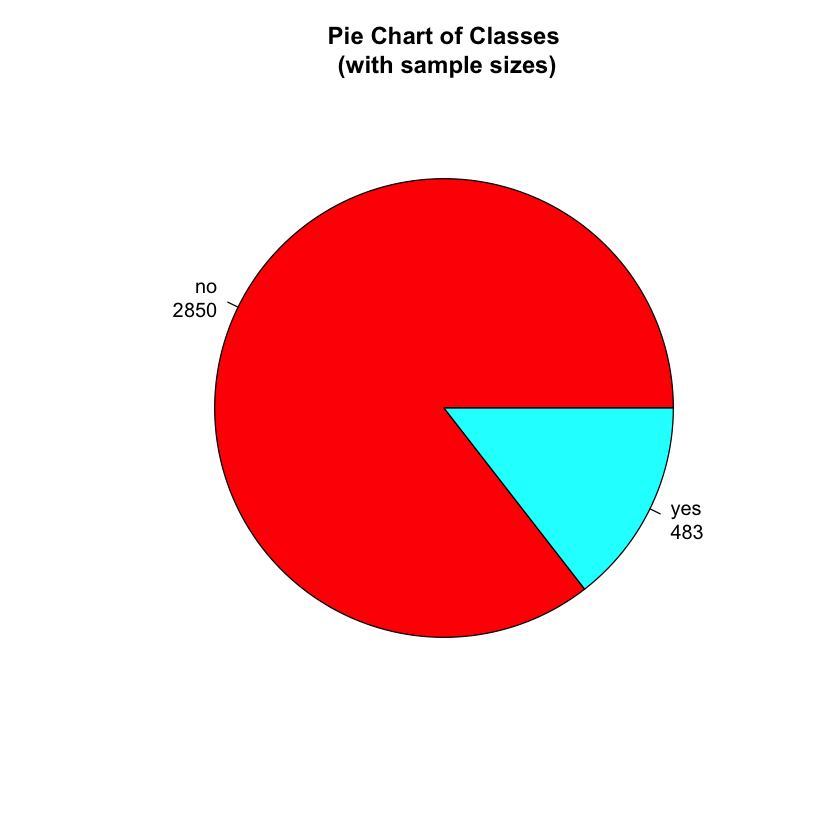

In [40]:
# Pie Chart from data 
mytable <- table(dataSet$Churn)
lbls <- paste(names(mytable), "\n", mytable, sep="")
pie(mytable, labels = lbls, col=rainbow(length(lbls)), 
    main="Pie Chart of Classes\n (with sample sizes)")

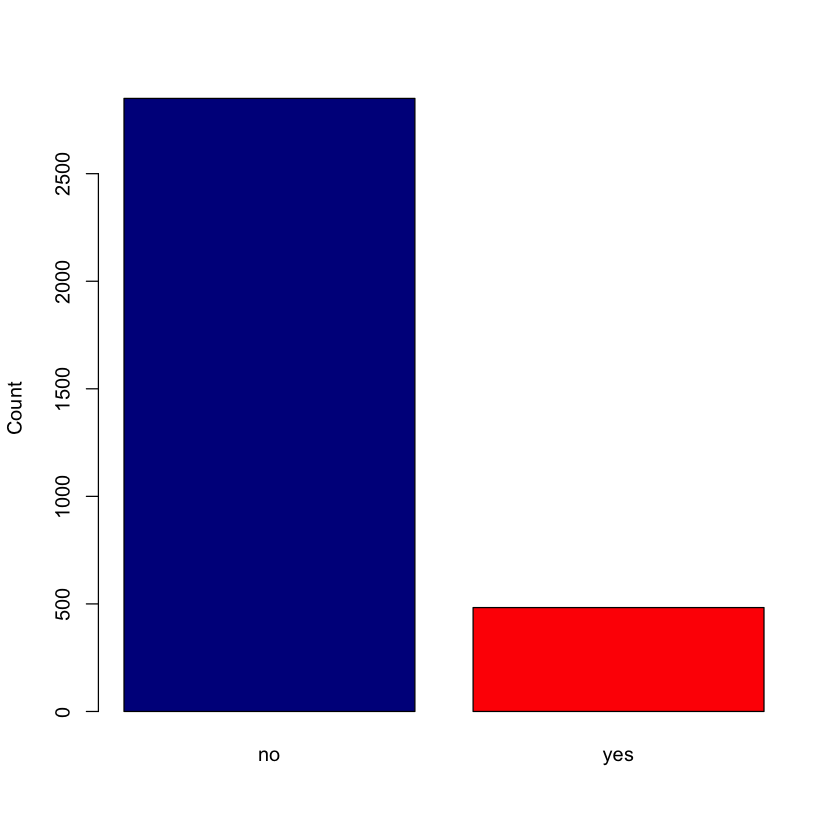

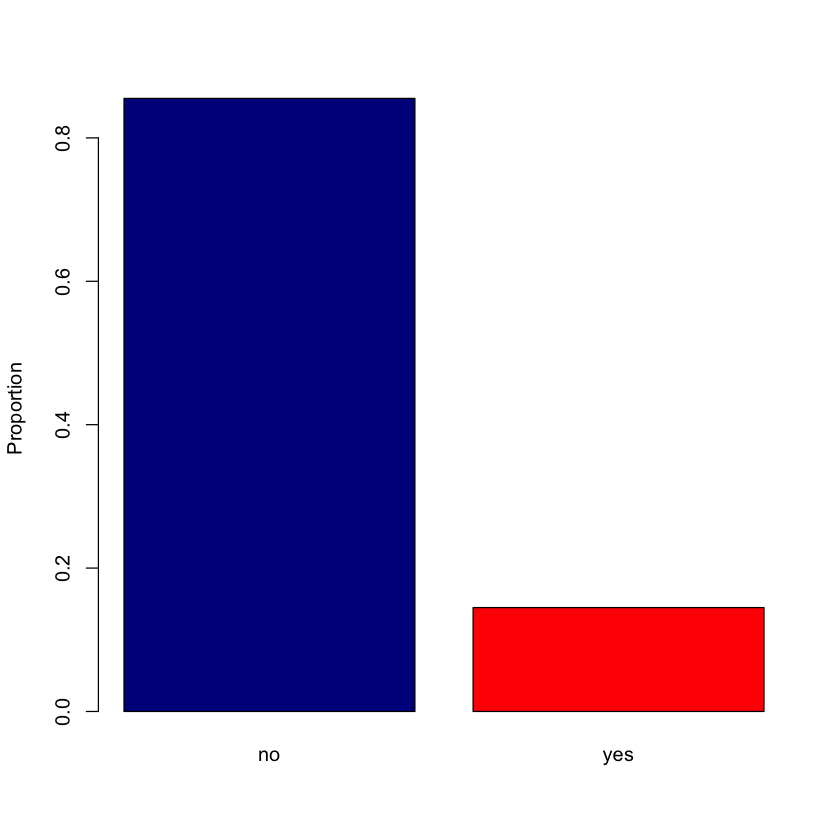

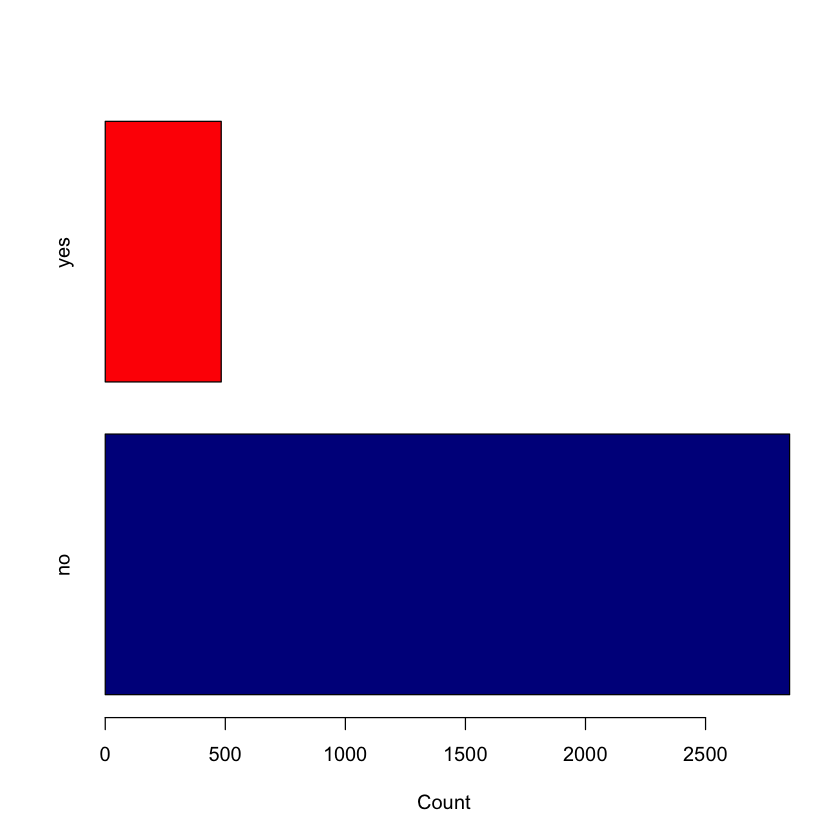

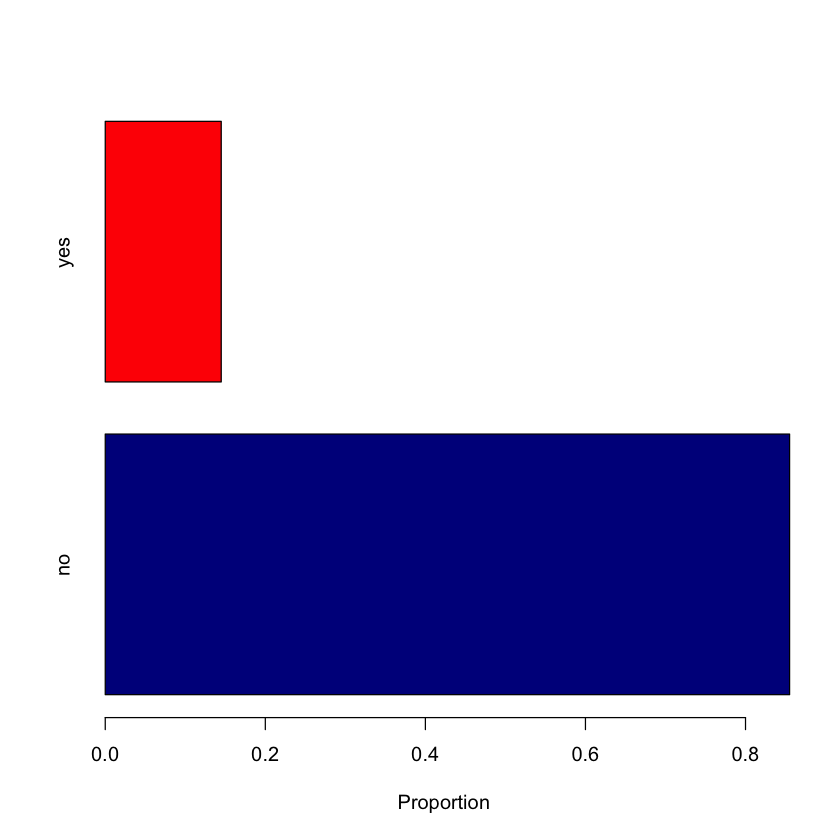

In [41]:
# Barplot of categorical data
par(mfrow=c(1,1))
barplot(table(dataSet$Churn), ylab = "Count", 
        col=c("darkblue","red"))
barplot(prop.table(table(dataSet$Churn)), ylab = "Proportion", 
        col=c("darkblue","red"))
barplot(table(dataSet$Churn), xlab = "Count", horiz = TRUE, 
        col=c("darkblue","red"))
barplot(prop.table(table(dataSet$Churn)), xlab = "Proportion", horiz = TRUE, 
        col=c("darkblue","red"))


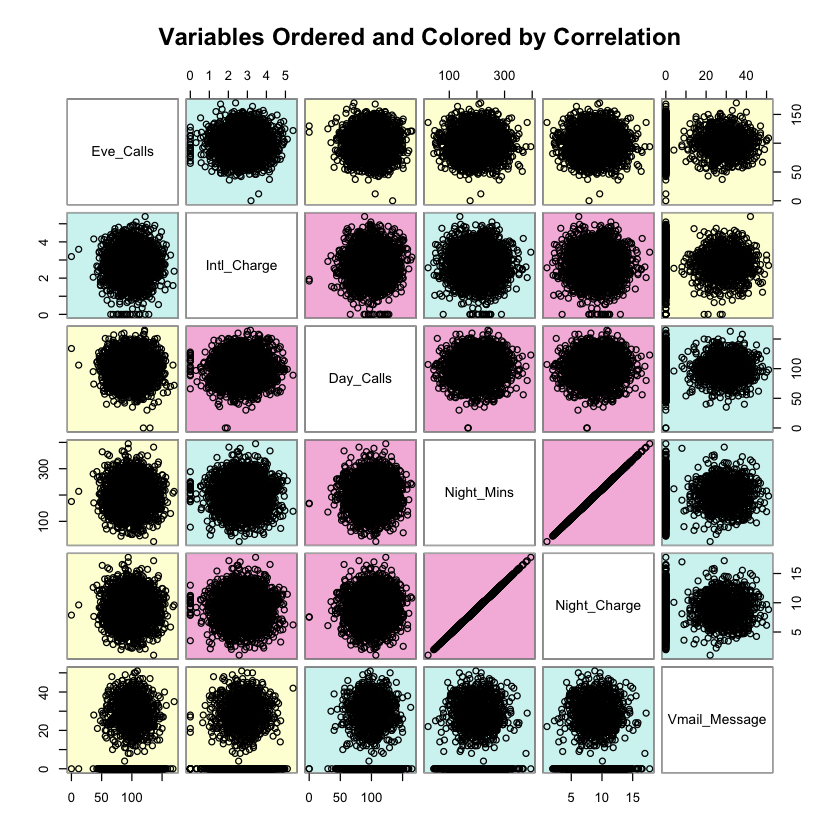

In [42]:
# Scatterplot Matrices from the glus Package 
library(gclus)
dta <- dataSet[c(2,5,11,13,16,18)] # get data 
dta.r <- abs(cor(dta)) # get correlations
dta.col <- dmat.color(dta.r) # get colors
# reorder variables so those with highest correlation are closest to the diagonal
dta.o <- order.single(dta.r) 
cpairs(dta, dta.o, panel.colors=dta.col, gap=.5, 
       main="Variables Ordered and Colored by Correlation" )

<h3>Visualise correlations</h3>

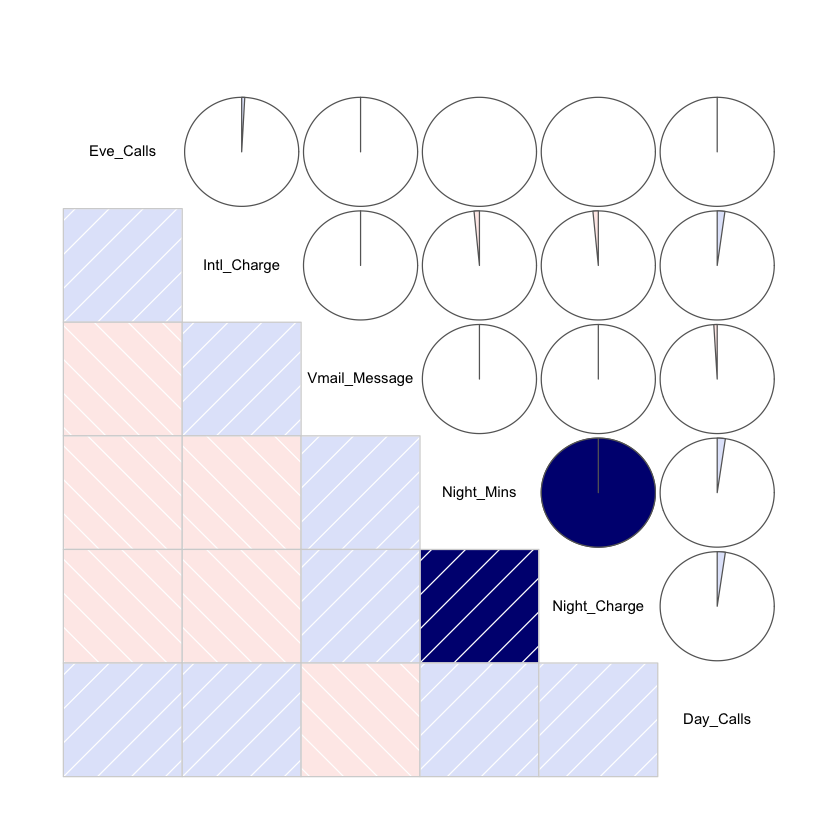

In [43]:
corrgram(dataSet[c(2,5,11,13,16,18)], order=TRUE, lower.panel=panel.shade,
         upper.panel=panel.pie, text.panel=panel.txt, main=" ")

In [44]:
# More graphs on correlatios amaong data
# Using "Hmisc"
res2 <- rcorr(as.matrix(dataSet[,c(2,5,11,13,16,18)]))
# Extract the correlation coefficients
res2$r
# Extract p-values
res2$P

,Vmail_Message,Night_Mins,Day_Calls,Eve_Calls,Night_Charge,Intl_Charge
Vmail_Message,1.000000000,0.007681136,-0.009548068,-0.005864351,0.007663290,0.002883658
Night_Mins,0.007681136,1.000000000,0.022937845,-0.002092768,0.999999215,-0.015179849
Day_Calls,-0.009548068,0.022937845,1.000000000,0.006462114,0.022926638,0.021666095
Eve_Calls,-0.005864351,-0.002092768,0.006462114,1.000000000,-0.002055984,0.008673858
Night_Charge,0.007663290,0.999999215,0.022926638,-0.002055984,1.000000000,-0.015186139
Intl_Charge,0.002883658,-0.015179849,0.021666095,0.008673858,-0.015186139,1.000000000


,Vmail_Message,Night_Mins,Day_Calls,Eve_Calls,Night_Charge,Intl_Charge
Vmail_Message,NA,0.6575570,0.5816089,0.7350335,0.6583020,0.8678283
Night_Mins,0.6575570,NA,0.1855268,0.9038694,0.0000000,0.3809828
Day_Calls,0.5816089,0.1855268,NA,0.7091964,0.1857418,0.2111142
Eve_Calls,0.7350335,0.9038694,0.7091964,NA,0.9055511,0.6166654
Night_Charge,0.6583020,0.0000000,0.1857418,0.9055511,NA,0.3807855
Intl_Charge,0.8678283,0.3809828,0.2111142,0.6166654,0.3807855,NA


corrplot 0.84 loaded



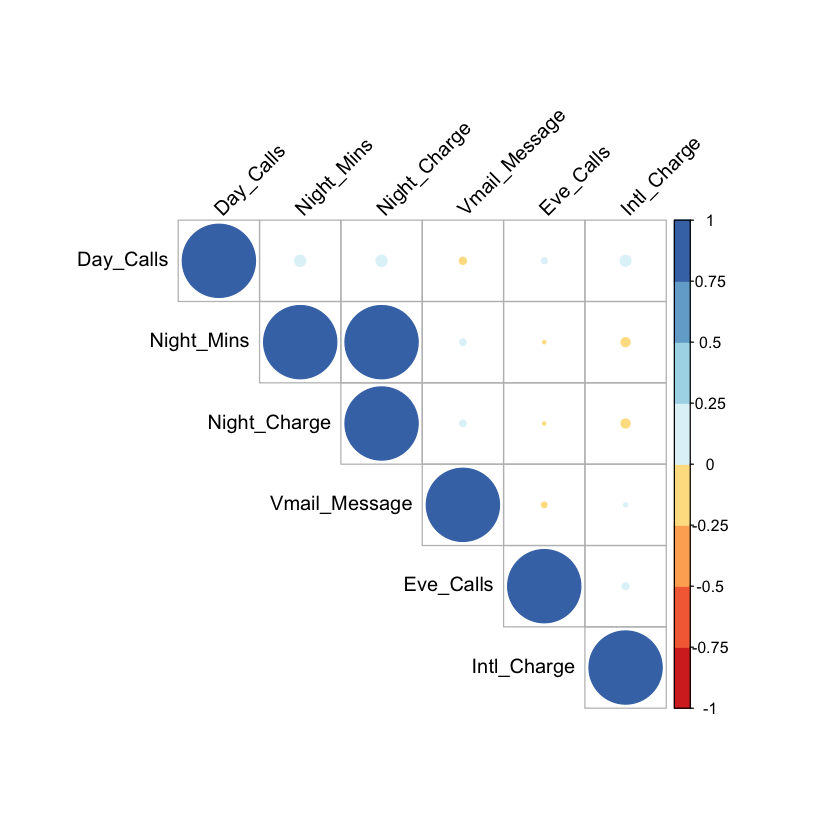

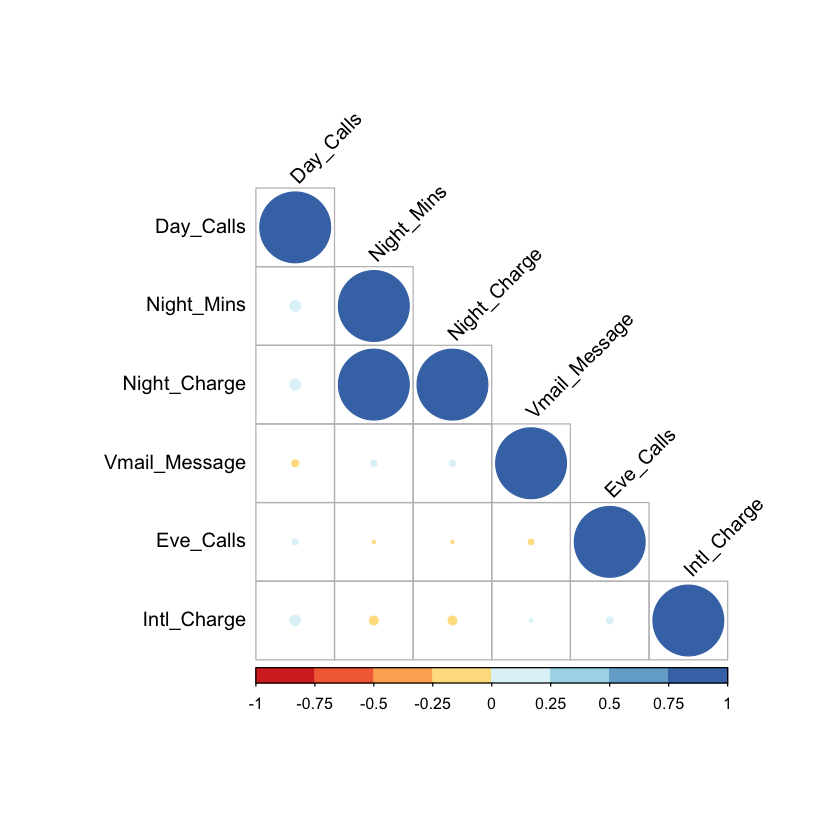

In [45]:
# Using "corrplot"
library(corrplot)
library(RColorBrewer)
corrplot(res2$r, type = "upper", order = "hclust", col=brewer.pal(n=8, name="RdYlBu"),
         tl.col = "black", tl.srt = 45)
corrplot(res2$r, type = "lower", order = "hclust", col=brewer.pal(n=8, name="RdYlBu"),
         tl.col = "black", tl.srt = 45)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




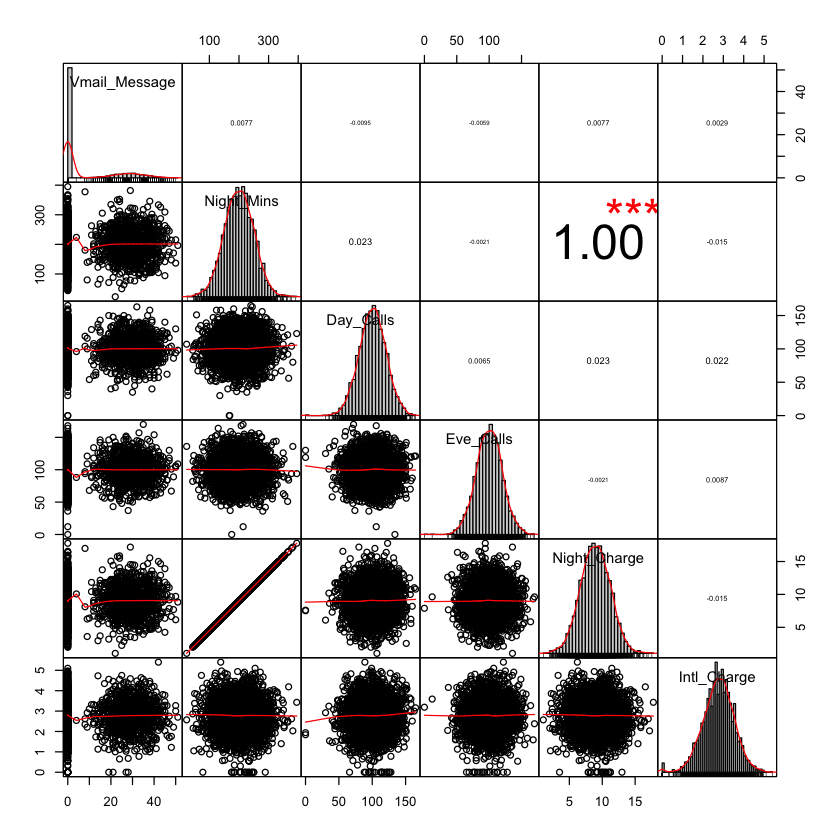

In [46]:
# Using PerformanceAnalytics
library(PerformanceAnalytics)
data <- dataSet[, c(2,5,11,13,16,18)]
chart.Correlation(data, histogram=TRUE, pch=19)

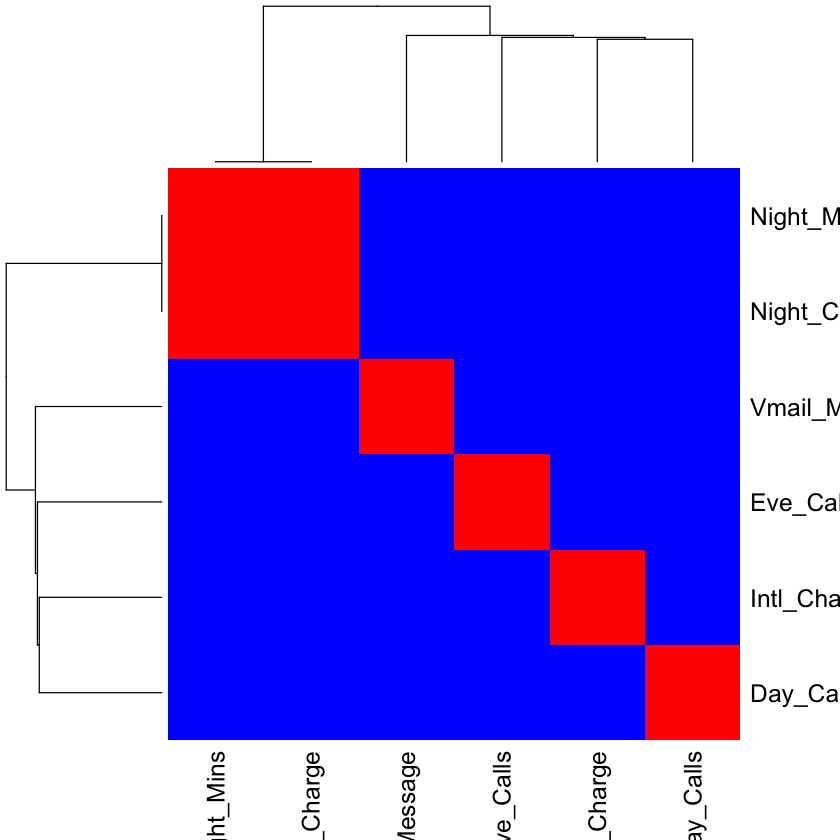

In [47]:
# Using Colored Headmap 
col <- colorRampPalette(c("blue", "white", "red"))(20)
heatmap(x = res2$r, col = col, symm = TRUE)

<p>We should notice that <b><i>Night_Mins</i></b> and <b><i>Night_Charge</i></b> have a strong, linear, positive relationship.</p>

## 6. Pre-Processing of DataSet i.e. train (75%) : test (25%) split

In [48]:
train_test_index <- createDataPartition(dataSet$Churn, p=0.75, list=FALSE)
training_dataset <- dataSet[, c(1:20)][train_test_index,]
testing_dataset  <- dataSet[, c(1:20)][-train_test_index,]

In [49]:
dim(training_dataset)
head(training_dataset, 10)

[1] 2501   20

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,128,25,265.1,197.4,244.7,10.0,1,no,1,2,110,45.07,99,16.78,91,11.01,3,2.70,17,415
3,137,0,243.4,121.2,162.6,12.2,0,no,1,1,114,41.38,110,10.30,104,7.32,5,3.29,32,415
4,84,0,299.4,61.9,196.9,6.6,2,no,2,1,71,50.90,88,5.26,89,8.86,7,1.78,36,408
5,75,0,166.7,148.3,186.9,10.1,3,no,2,1,113,28.34,122,12.61,121,8.41,3,2.73,37,415
7,121,24,218.2,348.5,212.6,7.5,3,no,1,2,88,37.09,108,29.62,118,9.57,7,2.03,20,510
8,147,0,157.0,103.1,211.8,7.1,0,no,2,1,79,26.69,94,8.76,96,9.53,6,1.92,25,415
9,117,0,184.5,351.6,215.8,8.7,1,no,1,1,97,31.37,80,29.89,90,9.71,4,2.35,19,408
10,141,37,258.6,222.0,326.4,11.2,0,no,2,2,84,43.96,111,18.87,97,14.69,5,3.02,50,415
11,65,0,129.1,228.5,208.8,12.7,4,yes,1,1,137,21.95,83,19.42,111,9.40,6,3.43,16,415


In [50]:
dim(testing_dataset)
head(testing_dataset, 10)

[1] 832  20

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
2,107,26,161.6,195.5,254.4,13.7,1,no,1,2,123,27.47,103,16.62,103,11.45,3,3.70,36,415
6,118,0,223.4,220.6,203.9,6.3,0,no,2,1,98,37.98,101,18.75,118,9.18,6,1.70,2,510
14,95,0,156.6,247.6,192.3,12.3,3,no,1,1,88,26.62,75,21.05,115,8.65,5,3.32,27,510
21,147,0,155.1,239.7,208.8,10.6,0,no,1,1,117,26.37,93,20.37,133,9.40,4,2.86,10,415
22,77,0,62.4,169.9,209.6,5.7,5,yes,1,1,89,10.61,121,14.44,64,9.43,6,1.54,6,408
23,130,0,183.0,72.9,181.8,9.5,0,no,1,1,112,31.11,99,6.20,78,8.18,19,2.57,4,415
25,132,0,81.1,245.2,237.0,10.3,0,no,1,1,86,13.79,72,20.84,115,10.67,2,2.78,46,510
38,78,0,130.8,223.7,227.8,10.0,1,no,1,1,64,22.24,116,19.01,108,10.25,5,2.70,20,415
50,97,24,133.2,217.2,70.6,11.0,1,no,1,2,135,22.64,58,18.46,79,3.18,3,2.97,51,415


<h3>Convert input data to matrix form</h3>

In [51]:
x_train <- as.matrix(training_dataset[c(1:7, 9:20)])
x_test  <- as.matrix(testing_dataset[c(1:7, 9:20)])

## 7. Normalization of input Data using "clusterSim" library

<h4>How to use <i>clusterSim</i></h4>
<ul>
    <li><i>x</i>: vector, matrix or dataset type;</li>
</ul>
<b>Type of normalization:</b>
<ul>
    <li><i>n<sub>0</sub></i>: without normalization;</li>
    <li><i>n<sub>1</sub></i>: standardization $(\frac{x - mean}{sd}) $;</li>
    <li><i>n<sub>2</sub></i>: positional standardization $(\frac{x - median}{mad}) $;</li> 
    <li><i>n<sub>2</sub></i>: positional standardization $(\frac{x - median}{mad}) $;</li> 
    <li><i>n<sub>3</sub></i>: unitization $(\frac{x - mean}{range}) $;</li> 
    <li><i>n<sub>3<sub>a</sub></sub></i>: positional unitization $(\frac{x - median}{range}) $;</li> 
    <li><i>n<sub>4</sub></i>: unitization with zero minimum $(\frac{x - min}{range}) $;</li> 
    <li><i>n<sub>5</sub></i>: normalization in range [-1,1] $(\frac{x-mean}{max([x - mean])}) $;</li> 
    <li><i>n<sub>5<sub>a</sub></sub></i>: positional normalization in range [-1,1] $(\frac{x-median}{max([x - median])}) $;</li>
    <li><i>n<sub>6</sub></i>: quotient transformation $(\frac{x}{sd}) $;</li>
    <li><i>n<sub>6<sub>a</sub></sub></i>: positional quotient transformation $(\frac{x}{mad}) $;</li>
    <li><i>n<sub>7</sub></i>: quotient transformation $(\frac{x}{range}) $;</li>
    <li><i>n<sub>8</sub></i>: quotient transformation $(\frac{x}{max}) $;</li>
    <li><i>n<sub>9</sub></i>: quotient transformation $(\frac{x}{mean}) $;</li>
    <li><i>n<sub>9</sub><sub>a</sub></i>: positional quotient transformation $(\frac{x}{median}) $;</li>
    <li><i>n<sub>10</sub></i>: quotient transformation $(\frac{x}{sum}) $;</li>
    <li><i>n<sub>11</sub></i>: quotient transformation $(\frac{x}{\sqrt{SSQ}}) $;</li>
    <li><i>n<sub>12</sub></i>: quotient transformation $(\frac{x-mean}{\sqrt{sum((x - mean)^2)}}) $;</li>
    <li><i>n<sub>12</sub><sub>a</sub></i>: positional normalization $(\frac{x-median}{\sqrt{sum((x - median)^2)}}) $;</li>
    <li><i>n<sub>13</sub></i>: normalization with zero being the central point $(\frac{x - midrange}{\frac{range}{2}}) $;</li>
</ul>                           
<b>Normalization:</b>
<ul>
    <li><i>column</i>: normalization by variable;</li>
    <li><i>row</i>: normalization by object;</li>
</ul>

In [52]:
library(clusterSim)
x_train <- data.Normalization(x = x_train, type = "n1", normalization = "column")
x_test  <- data.Normalization(x = x_test, type = "n1", normalization = "column")

<h3>Convert target data (categorical) to numeric form</h3>

In [53]:
y_train   <- as.numeric(as.factor(training_dataset$Churn))
y_test    <- as.numeric(as.factor(testing_dataset$Churn))
y_test_1  <- as.numeric(as.factor(testing_dataset$Churn))

<h3>Convert categorical target data to binary form </h3>

In [54]:
y_train <- keras::to_categorical(y_train)
y_test  <- keras::to_categorical(y_test)

In [55]:
# Check dimention
dim(x_train)
dim(y_train)

[1] 2501   19

[1] 2501    3

## 8. Model definition in Keras

In [56]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 256, activation = 'relu', input_shape = c(19)) %>% 
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dense(units = 64, activation = 'relu') %>%
  layer_dense(units = 28, activation = 'relu') %>%
  layer_dense(units = 3, activation = 'softmax')

<h3>Summary of the keras model</h3>

In [57]:
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 256)                     5120        
________________________________________________________________________________
dense_1 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dense_2 (Dense)                     (None, 64)                      8256        
________________________________________________________________________________
dense_3 (Dense)                     (None, 28)                      1820        
________________________________________________________________________________
dense_4 (Dense)                     (None, 3)                       87          
Total params: 48,179
Trainable params: 48,179
Non-trainable params: 0
___________________

<h3>Compile the keras model</h3>

In [58]:
model %>% compile(loss = 'categorical_crossentropy',
                  optimizer = optimizer_rmsprop(),
                  metrics = c('accuracy')
)

<h3>Fit or Train the keras model</h3>

In [59]:
history <- model %>% fit(x_train, y_train, 
                         epochs = 100, batch_size = 32, 
                         validation_split = 0.2
)

<h3>Plot the keras model's training behaviour</h3>

`geom_smooth()` using formula 'y ~ x'



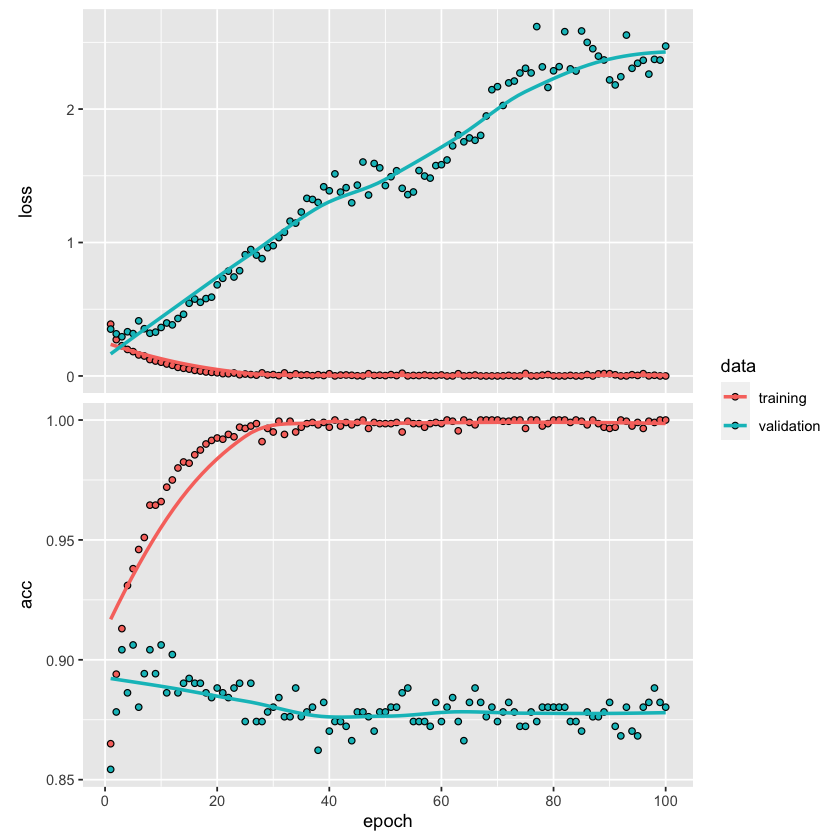

In [60]:
plot(history)

<h3>Evaluation of the keras model</h3>

In [61]:
model %>% evaluate(x_test, y_test)

$loss
[1] 1.661832

$acc
[1] 0.9086539

<h3>Estimate predicted probabilities and classes</h3>

In [62]:
pred_probabilities <- model %>% predict(x_test)
pred_classes <- model %>% predict_classes(x_test)

print("Results from the Keras Deep Learning model using TEST Data... ...\n"); 
res_  <- caret::confusionMatrix(table(pred_classes, y_test_1))
print(res_)
print(round(res_$overall, digits = 3))

[1] "Results from the Keras Deep Learning model using TEST Data... ...\n"
Confusion Matrix and Statistics

            y_test_1
pred_classes   1   2
           1 678  42
           2  34  78
                                         
               Accuracy : 0.9087         
                 95% CI : (0.887, 0.9274)
    No Information Rate : 0.8558         
    P-Value [Acc > NIR] : 2.82e-06       
                                         
                  Kappa : 0.6194         
                                         
 Mcnemar's Test P-Value : 0.422          
                                         
            Sensitivity : 0.9522         
            Specificity : 0.6500         
         Pos Pred Value : 0.9417         
         Neg Pred Value : 0.6964         
             Prevalence : 0.8558         
         Detection Rate : 0.8149         
   Detection Prevalence : 0.8654         
      Balanced Accuracy : 0.8011         
                                         
       'Pos

## 9. Save keras model on the disk

In [63]:
# save the entire model object
keras_save(model, path = "keras_model.h5")

In [64]:
# save just the weights file
keras_save_weights(model, path = "keras_model_weights.h5")

In [65]:
# save just the architecture (as human readable json)
keras_model_to_json(model, path = "keras_model.json")

<h3>Load the entire model object</h3>

In [76]:
model <- keras_load(path = "keras_model.h5")

In [77]:
print("Results from the Keras Deep Learning model using NEW Data... ...\n"); 

[1] "Results from the Keras Deep Learning model using NEW Data... ...\n"


In [78]:
data <- dataSet[c(1:7,9:20)]
data <- data.Normalization(data,"n1", "column")

<h3>Final Prediction</h3>

In [79]:
final_predictions <- predict_classes(model, as.matrix(data))
confusionMatrix(table(final_predictions, as.numeric(as.factor(dataSet$Churn))))
res_ <- confusionMatrix(table(final_predictions, as.numeric(as.factor(dataSet$Churn))))

Confusion Matrix and Statistics

                 
final_predictions    1    2
                1 2799   84
                2   51  399
                                          
               Accuracy : 0.9595          
                 95% CI : (0.9522, 0.9659)
    No Information Rate : 0.8551          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8318          
                                          
 Mcnemar's Test P-Value : 0.005885        
                                          
            Sensitivity : 0.9821          
            Specificity : 0.8261          
         Pos Pred Value : 0.9709          
         Neg Pred Value : 0.8867          
             Prevalence : 0.8551          
         Detection Rate : 0.8398          
   Detection Prevalence : 0.8650          
      Balanced Accuracy : 0.9041          
                                          
       'Positive' Class : 1               
     

In [80]:
print(res_)
print(round(res_$overall, digits = 3))
print(res_$table)
print(res_$byClass)

Confusion Matrix and Statistics

                 
final_predictions    1    2
                1 2799   84
                2   51  399
                                          
               Accuracy : 0.9595          
                 95% CI : (0.9522, 0.9659)
    No Information Rate : 0.8551          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8318          
                                          
 Mcnemar's Test P-Value : 0.005885        
                                          
            Sensitivity : 0.9821          
            Specificity : 0.8261          
         Pos Pred Value : 0.9709          
         Neg Pred Value : 0.8867          
             Prevalence : 0.8551          
         Detection Rate : 0.8398          
   Detection Prevalence : 0.8650          
      Balanced Accuracy : 0.9041          
                                          
       'Positive' Class : 1               
     

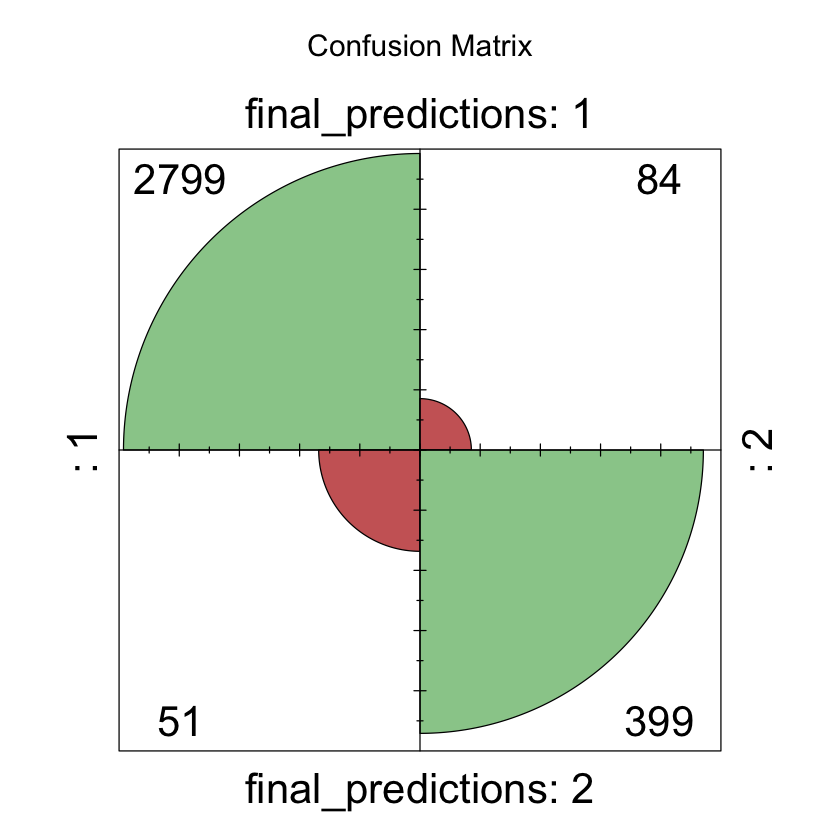

In [81]:
fourfoldplot(res_$table, color = c("#CC6666", "#99CC99"),
             conf.level = 0, margin = 1, main = "Confusion Matrix")

## REFERENCES

<ol>
    <li><a href="http://gforge.se/2015/02/how-to-go-parallel-in-r-basics-tips/"><i>Code parallelizing in R</i></a></li>
</ol>